In [44]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [45]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Corelação de Person

In [46]:
cor_test_sepal <- cor.test(iris$Sepal.Length, iris$Sepal.Width)
cor_test_sepal


	Pearson's product-moment correlation

data:  iris$Sepal.Length and iris$Sepal.Width
t = -1.4403, df = 148, p-value = 0.1519
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.27269325  0.04351158
sample estimates:
       cor 
-0.1175698 


O valor de p-value (0.1519) é maior que 0.05, o que significa que não há evidência suficiente para rejeitar a hipótese nula (H0). A hipótese nula nesse caso afirma que não há correlação entre Sepal.Length e Sepal.Width.

In [47]:
cor_test_sepal <- cor.test(iris$Petal.Length, iris$Petal.Width)
cor_test_sepal


	Pearson's product-moment correlation

data:  iris$Petal.Length and iris$Petal.Width
t = 43.387, df = 148, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9490525 0.9729853
sample estimates:
      cor 
0.9628654 


Há uma correlação positiva muito forte entre o comprimento e a largura das pétalas, o que faz sentido do ponto de vista biológico, já que essas dimensões provavelmente crescem juntas em muitas espécies de flores, incluindo as do dataset iris.

# 3. Análise em Componentes Principais (ACP)

Agora, realizamos uma ACP (Análise em Componentes Principais) com as variáveis adequadas (normalmente as quantitativas). Vamos eliminar a variável Species para focar nas variáveis numéricas.

In [48]:
library(FactoMineR)

In [49]:
iris_data <- iris[, 1:4] # Selecionar as variáveis quantitativas
pca_result <- PCA(iris_data, scale.unit = TRUE, graph = FALSE)

summary(pca_result)


Call:
PCA(X = iris_data, scale.unit = TRUE, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               2.918   0.914   0.147   0.021
% of var.             72.962  22.851   3.669   0.518
Cumulative % of var.  72.962  95.813  99.482 100.000

Individuals (the 10 first)
                 Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1            |  2.319 | -2.265  1.172  0.954 |  0.480  0.168  0.043 | -0.128
2            |  2.202 | -2.081  0.989  0.893 | -0.674  0.331  0.094 | -0.235
3            |  2.389 | -2.364  1.277  0.979 | -0.342  0.085  0.020 |  0.044
4            |  2.378 | -2.299  1.208  0.935 | -0.597  0.260  0.063 |  0.091
5            |  2.476 | -2.390  1.305  0.932 |  0.647  0.305  0.068 |  0.016
6            |  2.555 | -2.076  0.984  0.660 |  1.489  1.617  0.340 |  0.027
7            |  2.468 | -2.444  1.364  0.981 |  0.048  0.002  0.000 |  0.335
8            |  2.246 | -2.233  1.139  0.988 |  0.223  0.036  0.010 |

In [50]:
pca_result$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.91849782,72.9624454,72.96245
comp 2,0.91403047,22.8507618,95.81321
comp 3,0.14675688,3.6689219,99.48213
comp 4,0.02071484,0.5178709,100.00000


Examine o resumo das variáveis numéricas: Use a função summary em R para ver o alcance (mínimo e máximo) de cada variável. Se os valores das variáveis têm ordens de grandeza muito diferentes, a ACP normada é recomendada.

In [51]:
summary(iris[, 1:4])

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

Por fim, para uma ACP normada em R, caso os valores sejam bastante diferentes, você pode definir scale.unit = TRUE:

In [52]:
iris_acp <- PCA(iris[, 1:4], scale.unit = TRUE)

Para decidir quantos eixos manter com base no Critério de Kaiser, usamos os autovalores. De acordo com esse critério, você deve manter apenas os componentes **com autovalores maiores que 1**, pois eles capturam uma quantidade significativa de variância.

In [53]:
iris_acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.91849782,72.9624454,72.96245
comp 2,0.91403047,22.8507618,95.81321
comp 3,0.14675688,3.6689219,99.48213
comp 4,0.02071484,0.5178709,100.00000


Apenas o Componente 1 tem autovalor maior que 1. Portanto, o Critério de Kaiser sugere manter apenas o primeiro componente.

Variáveis que mais contribuem para os eixos 1 e 2:

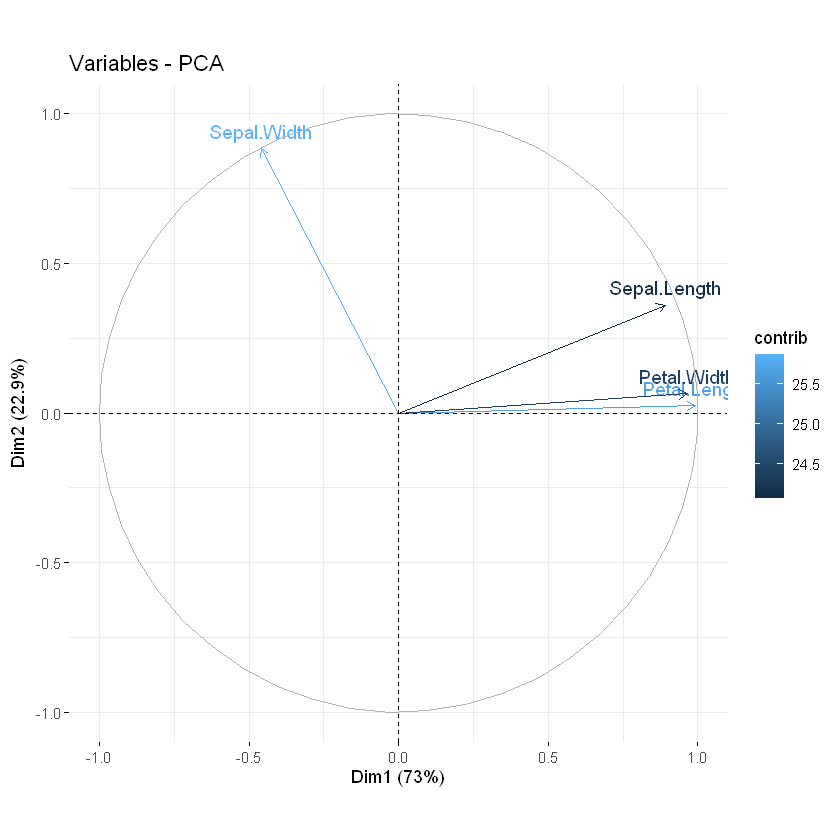

In [54]:
library(factoextra)
fviz_pca_var(iris_acp, col.var = "contrib")

In [55]:
iris_acp$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4
Sepal.Length,27.150969,14.24440565,51.777574,6.827052
Sepal.Width,7.254804,85.24748749,5.972245,1.525463
Petal.Length,33.687936,0.05998389,2.019990,64.232089
Petal.Width,31.906291,0.44812296,40.230191,27.415396


Variáveis bem representadas no plano (1, 2):

In [56]:
# Cos2 das variáveis no plano (1, 2)
iris_acp$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4
Sepal.Length,0.7924004,0.130198208,0.075987149,0.0014142127
Sepal.Width,0.2117313,0.779188012,0.008764681,0.0003159971
Petal.Length,0.9831817,0.000548271,0.002964475,0.0133055723
Petal.Width,0.9311844,0.004095980,0.059040571,0.0056790544


Exemplo de uma iris melhor representada no plano (1,3)

In [57]:
cos2_plane_12 <- iris_acp$ind$cos2[, 1] + iris_acp$ind$cos2[, 2]
cos2_plane_13 <- iris_acp$ind$cos2[, 1] + iris_acp$ind$cos2[, 3]

better_in_13 <- which(cos2_plane_13 > cos2_plane_12)

example <- better_in_13[1]
list(
  Iris_Index = example,
  Cos2_Plane_12 = cos2_plane_12[example],
  Cos2_Plane_13 = cos2_plane_13[example]
)

$Iris_Index
7 
7 

$Cos2_Plane_12
        7 
0.9812967 

$Cos2_Plane_13
        7 
0.9994051

# Part 2
Distância entre Iris 6 e 3:

In [58]:
dist_iris <- dist(iris[, 1:4])
as.matrix(dist_iris)[6, 3]

[1] 1.086278

Código para achar a classificação a partir da matriz de distâncias:

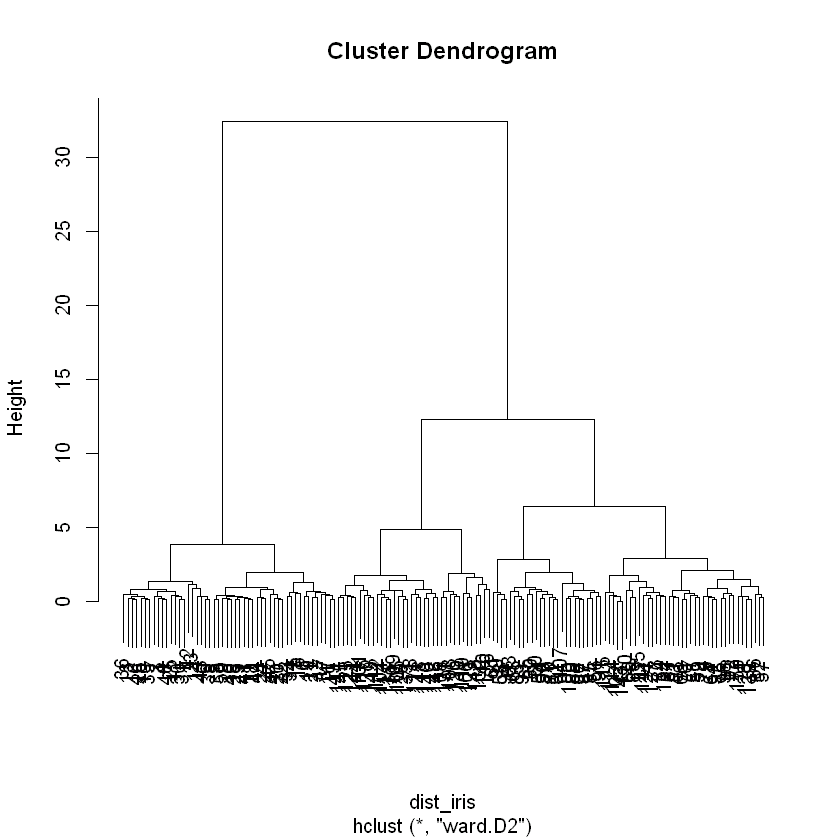

In [59]:
hc_iris <- hclust(dist_iris, method = "ward.D2")
plot(hc_iris)

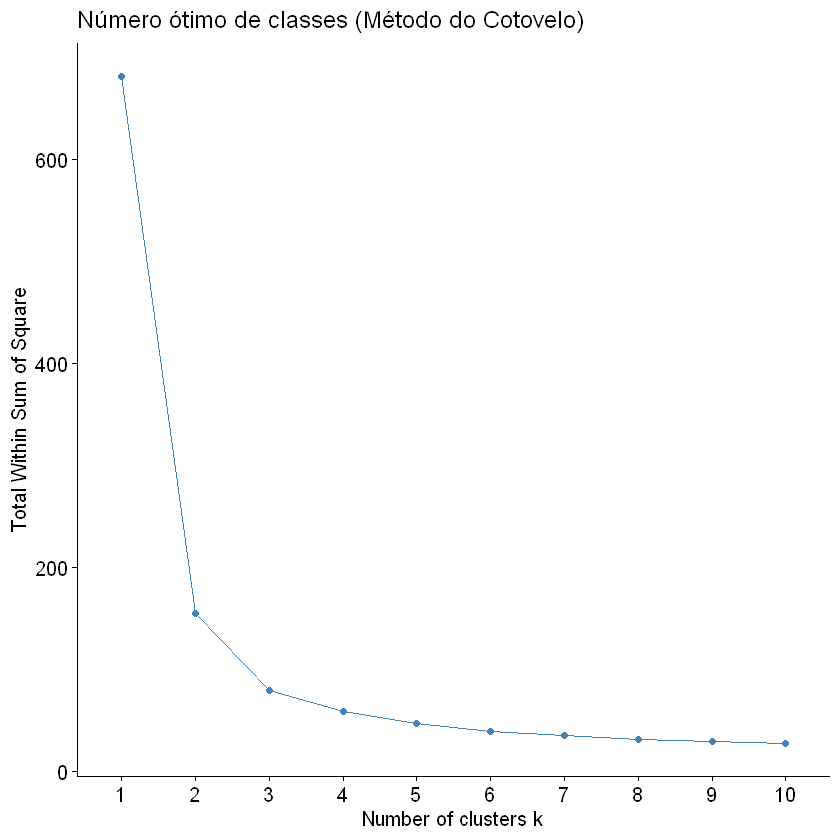

In [60]:
fviz_nbclust(iris[, -5], hcut, method = "wss") + 
  labs(title = "Número ótimo de classes (Método do Cotovelo)")

In [61]:
# bom senso

eig <- iris_acp$eig

# Variância acumulada
eig_cumsum <- cumsum(eig[, 2])  # Soma acumulada da variância explicada

# Identificar o número mínimo de eixos que capturam pelo menos 70% da variância
num_axes <- which(eig_cumsum >= 70)[1]

# Exibir o resultado
list(
  Variancia_Explicada = eig[, 2],
  Variancia_Acumulada = eig_cumsum,
  Eixos_Selecionados = num_axes
)


$Variancia_Explicada
    comp 1     comp 2     comp 3     comp 4 
72.9624454 22.8507618  3.6689219  0.5178709 

$Variancia_Acumulada
   comp 1    comp 2    comp 3    comp 4 
 72.96245  95.81321  99.48213 100.00000 

$Eixos_Selecionados
comp 1 
     1

A regra do bom-senso não faz sentido aqui, dado que mais de 70% da variância acumulada está em somente um eixo. 

## Procure Grandes Saltos nos Ramos: 
Observe onde há grandes distâncias verticais (grandes saltos) entre as junções dos grupos. Estes saltos indicam um nível importante de separação entre grupos.

> Cada linha horizontal representa uma união de grupos, e a altura mostra o "custo" ou "distância" para unir esses grupos.
Um grande salto significa que unir mais grupos além daquele ponto traria uma grande perda de similaridade, então geralmente cortamos o dendrograma antes desse grande salto.


---
Como disse o enunciado, trabalharemos com 3 classes.

In [1]:
classes <- cutree(hc_iris, k = 3) # Dividir os dados em k = 3 classes
table(classes)  # Ver quantas observações estão em cada classe

ERROR: Error: objeto 'hc_iris' não encontrado


Identificar todos os indivíduos com base na classe!

In [63]:
print(data.frame(Individuo = rownames(iris), Classe = classes))

    Individuo Classe
1           1      1
2           2      1
3           3      1
4           4      1
5           5      1
6           6      1
7           7      1
8           8      1
9           9      1
10         10      1
11         11      1
12         12      1
13         13      1
14         14      1
15         15      1
16         16      1
17         17      1
18         18      1
19         19      1
20         20      1
21         21      1
22         22      1
23         23      1
24         24      1
25         25      1
26         26      1
27         27      1
28         28      1
29         29      1
30         30      1
31         31      1
32         32      1
33         33      1
34         34      1
35         35      1
36         36      1
37         37      1
38         38      1
39         39      1
40         40      1
41         41      1
42         42      1
43         43      1
44         44      1
45         45      1
46         46      1
47         47

Classe do Iris 70:

In [64]:
classes[70]

[1] 2

Média de Sepal.Length por Classe

In [65]:
aggregate(Sepal.Length ~ classes, data = iris, mean)

classes,Sepal.Length
<int>,<dbl>
1,5.006000
2,5.920312
3,6.869444


Análise Discriminante

CAH significa Classificação Ascendente Hierárquica (em inglês, Hierarchical Ascendant Classification - HAC), que é um método de agrupamento hierárquico. Ele organiza os dados em uma hierarquia de grupos ou clusters sem a necessidade de definir um número fixo de grupos antes de iniciar o processo.

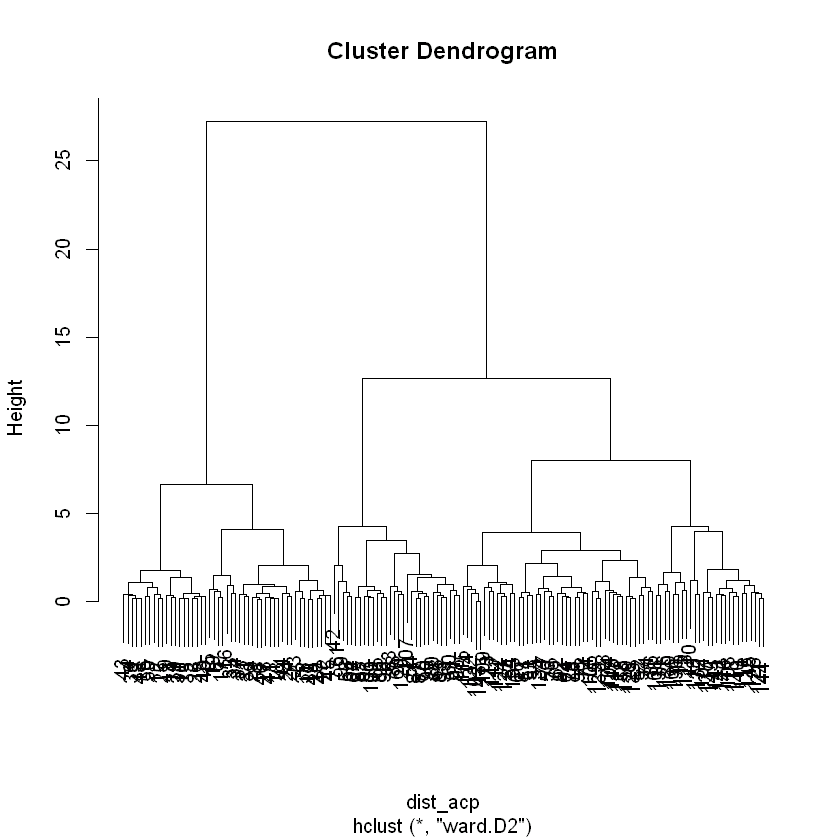

In [66]:
dist_acp <- dist(iris_acp$ind$coord[, 1:4])
hc_acp <- hclust(dist_acp, method = "ward.D2")
plot(hc_acp)

Classificação das Variáveis por Discriminância: Utilize uma análise discriminante linear para verificar a importância das variáveis.

In [67]:
library(MASS)
lda_model <- lda(Species ~ ., data = iris)
lda_model


Call:
lda(Species ~ ., data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776 -0.02410215
Sepal.Width   1.5344731 -2.16452123
Petal.Length -2.2012117  0.93192121
Petal.Width  -2.8104603 -2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

#### Conclusão

O LD1 captura 99.12% da variância discriminante (o que significa que a maior parte da separação entre as classes está nesse eixo), enquanto o LD2 captura apenas 0.88%.

As variáveis mais importantes para a separação entre as classes são aquelas com os maiores valores absolutos nos coeficientes de LD1 (já que ele captura quase toda a discriminação):

Petal.Width: -2.8104603 (mais discriminante)
Petal.Length: -2.2012117
Sepal.Width: 1.5344731
Sepal.Length: 0.8293776 (menos discriminante)

A ordem de importância (da mais discriminante para a menos discriminante) é:

1. Petal.Width
2. Petal.Length
3. Sepal.Width
4. Sepal.Length

Teste de Wilks:

In [68]:
iris_manova <- manova(cbind(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width) ~ Species, data = iris)
summary(iris_manova, test = "Wilks")

           Df    Wilks approx F num Df den Df    Pr(>F)    
Species     2 0.023439   199.15      8    288 < 2.2e-16 ***
Residuals 147                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [69]:
lda_model$svd^2 / sum(lda_model$svd^2)

[1] 0.991212605 0.008787395

Taxa de Erro do Modelo Discriminante:

In [70]:
predictions <- predict(lda_model)
table(predictions$class, iris$Species)
mean(predictions$class != iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         1
  virginica       0          2        49

[1] 0.02

Para realizar uma análise discriminante no conjunto de dados iris, usamos o modelo de análise discriminante linear (LDA). O número de eixos discriminantes é definido por 
min(𝑛_classes − 1, 𝑛_variáveis), que, no caso do iris, será min(3−1, 4) = 2

In [78]:
# Fazer predições nos dados originais
pred <- predict(lda_model, iris)

confusion_matrix <- table(Predito = pred$class, Real = iris$Species)

# Calcular a taxa de erro
total <- sum(confusion_matrix)  # Total de observações
erros <- total - sum(diag(confusion_matrix))  # Total de erros (fora da diagonal principal)
taxa_erro <- erros / total  # Taxa de erro em porcentagem

cat(taxa_erro* 100, "% de erro.")

2 % de erro.

In [71]:
new_iris <- data.frame(Sepal.Length = 6.3, Sepal.Width = 3, Petal.Length = 5.2, Petal.Width = 1.8)
predict(lda_model, newdata = new_iris)

$class
[1] virginica
Levels: setosa versicolor virginica

$posterior
        setosa versicolor virginica
1 1.289824e-32 0.02988645 0.9701136

$x
        LD1        LD2
1 -4.571524 -0.2484825